# 1.Businees Understanding  


The goal of analyzing the Blinkit dataset is to enhance the company's operations and customer engagement through data-driven insights.

1. What are the best-selling products and categories?
2. Which year saw the highest number of new outlet establishments?
3. What is the average rating for products?

In [1]:
#Import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#for inline
%matplotlib inline





# 2.Data Understanding

In [2]:
# Load the dataset into a pandas DataFrame 
df=pd.read_csv("BlinkIT Grocery Data.csv",sep=",")
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [3]:
#for knowing how much rows and columns are there
df.shape

(8523, 12)

In [4]:
#To fetch first 5 rows of dataset
df.head()

#to fetch last 5 rows of dataset
#df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
#to know columns names
df.columns.values

array(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type',
       'Item Visibility', 'Item Weight', 'Sales', 'Rating'], dtype=object)

In [6]:
#to find missing data/null value,to find datatype,columns name and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#to find missing values in columns
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

# 3.Data Preparation

The mean is a central measure of tendency, so replacing missing values with the mean avoids introducing bias, as it represents an average value typical of the data.

In [8]:
#replace the missing value by fillna method with help of mean 
df['Item Weight'].fillna(df['Item Weight'].mean(),inplace=True)


In [9]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
#provides a snapshot of the dataset
df.describe()


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.226124,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,9.310000,93.826500,4.000000
50%,2016.000000,0.053931,12.857645,143.012800,4.000000
75%,2018.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


# 4.Data Modeling 

Analysis Or Evaluation

In this 8523 are total rows present in blinkit dataset

Supermarket Type1    65.434706
Grocery Store        12.706793
Supermarket Type3    10.970316
Supermarket Type2    10.888185
Name: Outlet Type, dtype: float64


C:\Users\akash bankar\bankar\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

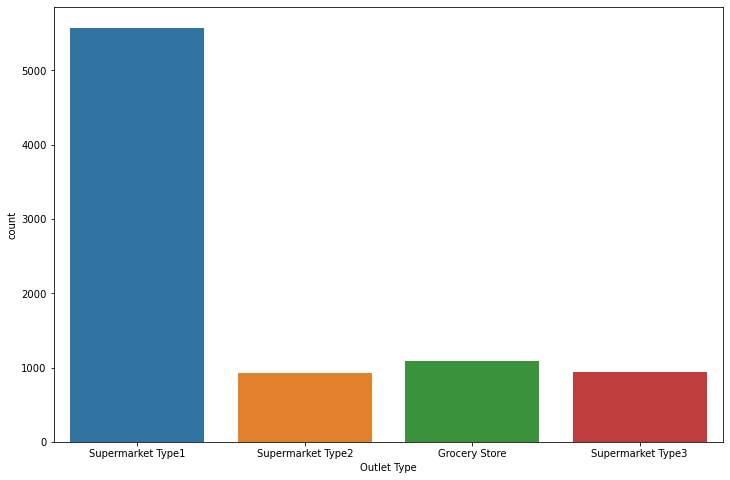

In [12]:
#show the how much outlets are there with percentage
total_rows = len(df)
print((df['Outlet Type'].value_counts()/total_rows)*100)

#show the graphs of outlets count with outlet type
plt.tight_layout()
plt.figure(figsize=(12, 8)) 
sns.countplot(df['Outlet Type'])
plt.show()

The above graph represents the distribution of different store types within a dataset, where "Supermarket Type1" dominates with approximately 65.43% of the total, followed by "Grocery Store" at 12.71%, "Supermarket Type3" at 10.97%, and "Supermarket Type2" at 10.89%. This indicates that "Supermarket Type1" is the most prevalent store type in the dataset.

2018    17.165317
2014    10.935117
2012    10.911651
2016    10.911651
2017    10.911651
2015    10.899918
2022    10.888185
2020    10.864719
2011     6.511792
Name: Outlet Establishment Year, dtype: float64


C:\Users\akash bankar\bankar\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


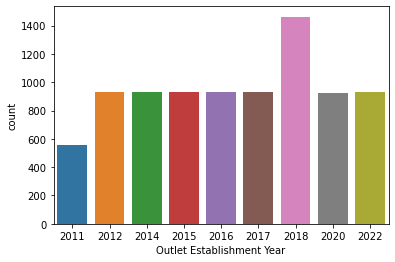

In [13]:
#show the how much outlets are open in every year with percentage
print((df['Outlet Establishment Year'].value_counts()/8523)*100)

#show the graphs of outlets opening in every year
sns.countplot(df['Outlet Establishment Year'])
plt.show()

The above graph shows the distribution of store establishments by year, with 2018 having the highest percentage at 17.17%, followed by 2014 at 10.94%, and several other years (2012, 2016, 2017, 2015, 2022, and 2020) all contributing around 10.9% each. The year 2011 has the lowest percentage at 6.51%. This suggests that most outlets were established in 2018, with other years having relatively similar establishment rates.

In [14]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


Low Fat    59.709023
Regular    33.896515
LF          3.707615
reg         1.372756
low fat     1.314091
Name: Item Fat Content, dtype: float64


C:\Users\akash bankar\bankar\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


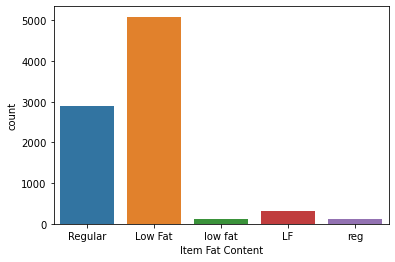

In [15]:
#show the how much Item Fat Content sell with percentage
print((df['Item Fat Content'].value_counts()/8523)*100)
sns.countplot(df['Item Fat Content'])
plt.show()

The above graph illustrates the distribution of item fat content, where "Low Fat" items dominate at 59.71%, followed by "Regular" items at 33.90%. Minor variations like "LF," "reg," and "low fat" account for small percentages, indicating inconsistencies in labeling but generally confirming that low-fat items are more prevalent in the dataset.

Tier 3    39.305409
Tier 2    32.676288
Tier 1    28.018303
Name: Outlet Location Type, dtype: float64


C:\Users\akash bankar\bankar\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


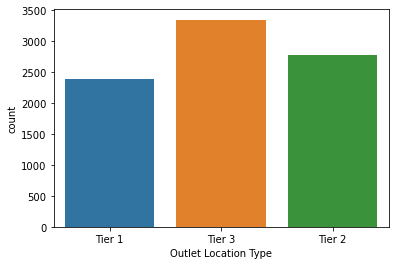

In [16]:
# Calculate the percentage of each outlet location type
print((df['Outlet Location Type'].value_counts()/8523)*100)

#Visualize the distribution of outlet location types
sns.countplot(df['Outlet Location Type'])
plt.show()

The above graph represents the distribution of outlets by location tier, showing that Tier 3 locations make up the largest portion at 39.31%, followed by Tier 2 at 32.68%, and Tier 1 at 28.02%. This suggests that a significant number of outlets are located in Tier 3 areas, with fewer in Tier 1 locations.


C:\Users\akash bankar\bankar\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.06192073080990199
-0.8129939979746537


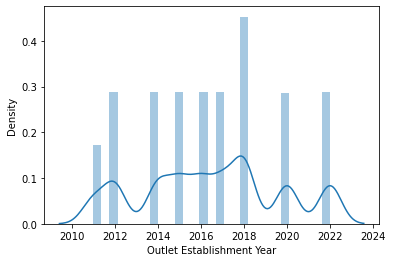

In [17]:
# Plot the distribution of Outlet Establishment Year
sns.distplot(df['Outlet Establishment Year'])

# Calculate and print the skewness of the 'Outlet Establishment Year' column
print(df['Outlet Establishment Year'].skew())

# Calculate and print the kurtosis of the 'Outlet Establishment Year' column
print(df['Outlet Establishment Year'].kurt())

Above graph show us how many outlets are established per year and in this graph we see in 2018 maximun outlets are open

C:\Users\akash bankar\bankar\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


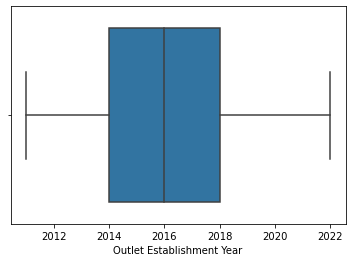

In [18]:
# Plot the distribution of Outlet Establishment Year
sns.boxplot(df['Outlet Establishment Year'])
plt.show()

Above graph show us how many outlets are established per year and in this graph we see in 2018 maximun outlets are open

In [19]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### Q1.What are the best-selling categories?

In [20]:
# Aggregate sales data by category
category_sales = df.groupby('Item Type')['Sales'].sum().reset_index()

In [21]:
# Sort to find the best-selling categories
top_categories = category_sales.sort_values(by='Sales', ascending=False)

In [22]:
# Display top 10 categories
print(top_categories.head(10))

                Item Type        Sales
6   Fruits and Vegetables  178124.0810
13            Snack Foods  175433.9224
9               Household  135976.5254
5            Frozen Foods  118558.8814
4                   Dairy  101276.4616
3                  Canned   90706.7290
0            Baking Goods   81894.7364
8      Health and Hygiene   68025.8388
10                   Meat   59449.8638
14            Soft Drinks   58514.1670


##### visualization


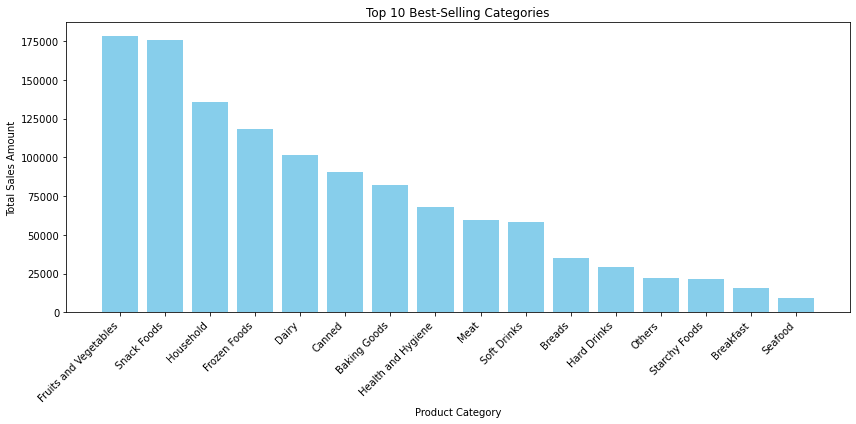

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(top_categories['Item Type'], top_categories['Sales'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Top 10 Best-Selling Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



This bar chart visualizes the total sales amount for the top 10 best-selling categories,providing a clear comparison of their sales performance.

### Q2.Which year saw the highest number of new outlet establishments?

In [24]:
#analyse
# Count the number of outlets established each year
outlet_counts_per_year = df['Outlet Establishment Year'].value_counts().reset_index()
outlet_counts_per_year.columns = ['Year', 'Number_of_Outlets']

In [25]:
# Find the year with the highest number of new establishments
max_outlet_year = outlet_counts_per_year.sort_values(by='Number_of_Outlets', ascending=False).iloc[0]
year = max_outlet_year['Year']
num_outlets = max_outlet_year['Number_of_Outlets']

In [26]:
#result 
print(f"The year with the highest number of new outlet establishments is {year} with {num_outlets} new outlets")

The year with the highest number of new outlet establishments is 2018 with 1463 new outlets


##### visualization


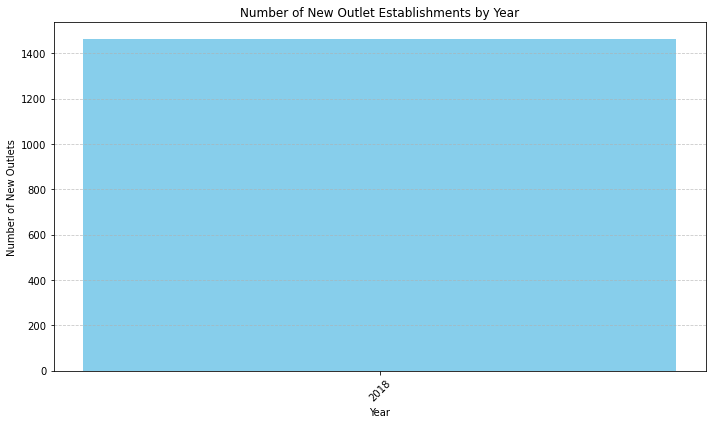

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(max_outlet_year['Year'].astype(str), max_outlet_year['Number_of_Outlets'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of New Outlets')
plt.title('Number of New Outlet Establishments by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This above bar chart visualizes the number of new outlet establishments by year, highlighting the year with the highest number of new outlets. The grid lines provide a clearer view of the distribution of outlet establishments over the years.

### Q3.What is the average rating for products?

In [28]:
# Calculate the average rating
average_rating = df['Rating'].mean()

In [29]:
# Display the average rating
print(f"The average rating for products is: {average_rating:.2f}")

The average rating for products is: 3.97


##### visualization



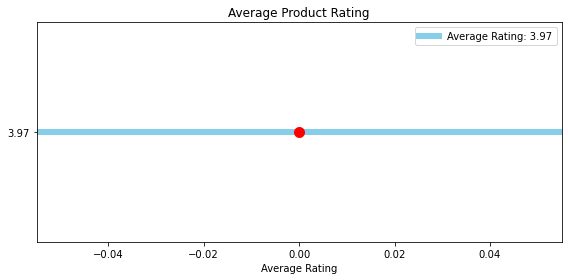

In [30]:

plt.figure(figsize=(8, 4))
# Plot a horizontal line representing the average rating
plt.axhline(y=average_rating, color='skyblue', linewidth=6, label=f'Average Rating: {average_rating:.2f}')
# Add a scatter point at the average rating
plt.scatter(x=0, y=average_rating, color='red', s=100, zorder=5)
# Add labels and title
plt.yticks([average_rating], [f'{average_rating:.2f}'])
plt.xlabel('Average Rating')
plt.title('Average Product Rating')
# Add a legend
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()






The horizontal line plot displays the average product rating as a clear reference point. The line, along with a scatter point, highlights the average rating value, providing an easy visual comparison.

